In [71]:
import pandas as pd
import datetime as dt
from datetime import date
import yfinance as yf
from neuralprophet import NeuralProphet,set_log_level,save
import matplotlib.pyplot as plt
import warnings

In [3]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
df = yf.download('GC=F', start=START, end=TODAY)

# Ensure the index is reset correctly
df = df[['Close']].reset_index()

# Rename columns for Neural Prophet
df.columns = ['ds', 'y']

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,ds,y
0,2010-01-04,1117.699951
1,2010-01-05,1118.099976
2,2010-01-06,1135.900024
3,2010-01-07,1133.099976
4,2010-01-08,1138.199951


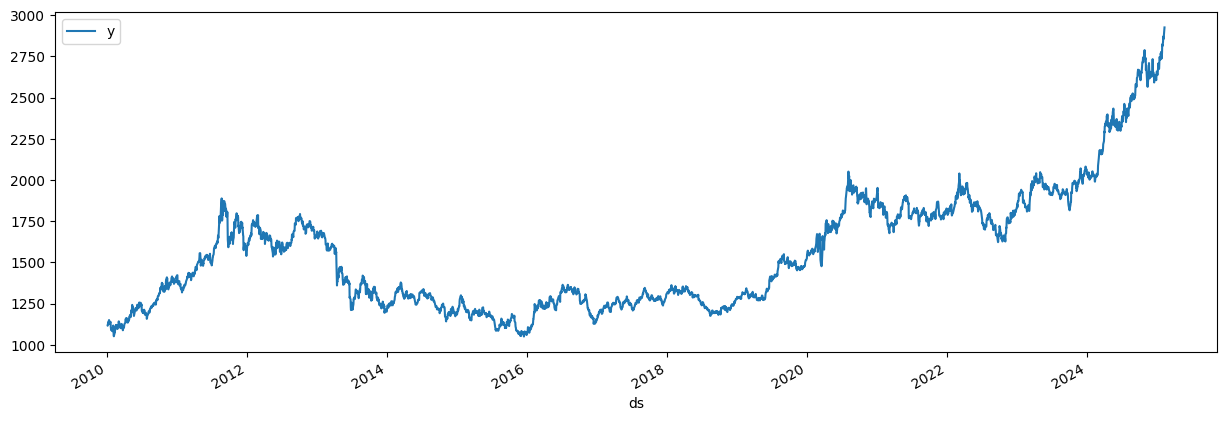

In [5]:
plt = df.plot(x="ds", y="y", figsize=(15, 5))

In [17]:
warnings.filterwarnings("ignore")
set_log_level("ERROR")
m = NeuralProphet()

metrics = m.fit(df)

forecast = m.predict(df)

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 239/239 [00:04<00:00, 52.74it/s]


Training: |          | 0/? [01:11<?, ?it/s, v_num=5, train_loss=0.0131, reg_loss=0.000, MAE=88.00, RMSE=120.0, Loss=0.0131, RegLoss=0.000] 
Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 67.05it/s]


In [35]:
m.set_plotting_backend("matplotlib")

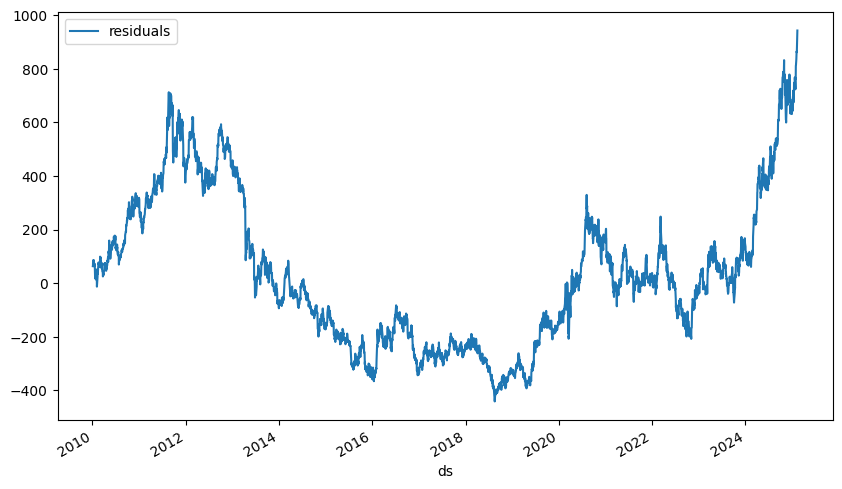

In [43]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [119]:
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 240/240 [00:03<00:00, 66.11it/s]


Training: |          | 0/? [01:11<?, ?it/s, v_num=21, train_loss=0.000362, reg_loss=0.000, MAE=15.70, RMSE=21.30, Loss=0.000362, RegLoss=0.000]
Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 50.63it/s]


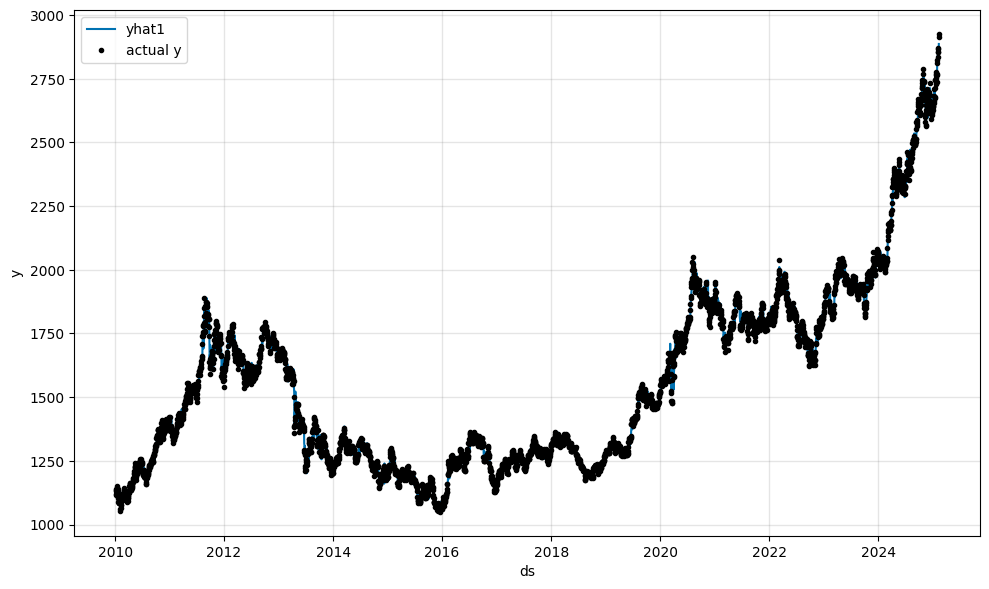

In [120]:
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

In [122]:
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

Epoch 70: 100%|██████████| 70/70 [03:06<00:00,  0.37it/s]   
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 239/239 [00:04<00:00, 59.16it/s]


Training: |          | 0/? [01:13<?, ?it/s, v_num=22, train_loss=0.0131, reg_loss=0.000, MAE=87.20, RMSE=119.0, Loss=0.013, RegLoss=0.000] 


Predicting DataLoader 0: 100%|██████████| 5/5 [00:00<00:00, 57.47it/s]


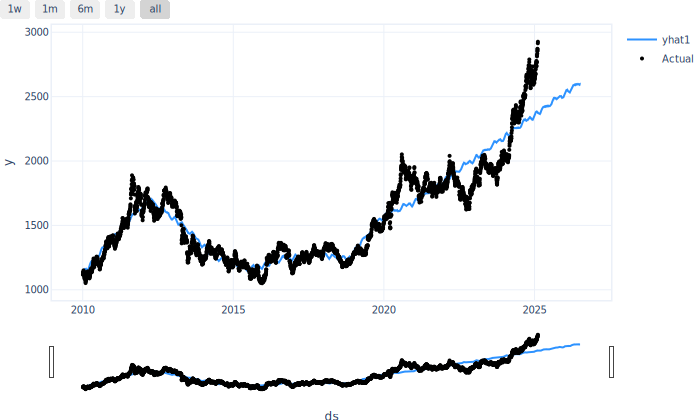

In [123]:
warnings.filterwarnings("ignore")
set_log_level("ERROR")

df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [117]:
df_future.tail()

,ds,y
3796,2025-02-06,2856.000000
3797,2025-02-07,2867.300049
3798,2025-02-10,2914.300049
3799,2025-02-11,2926.199951
3800,2025-02-12,NaN


In [118]:
forecast.tail()

,ds,y,yhat1,ar1,trend,season_yearly,season_weekly,season_daily
3938,2025-02-06,2856.000000,2865.621582,968.740295,1738.646973,206.050522,274.931305,-322.747589
3939,2025-02-07,2867.300049,2864.857422,970.839233,1738.657959,203.560806,274.080505,-322.281250
3940,2025-02-10,2914.300049,2895.656250,1009.239319,1738.691162,196.029694,273.717529,-322.021484
3941,2025-02-11,2926.199951,2900.762207,1016.583984,1738.702148,193.504044,275.036530,-323.064667
3942,2025-02-12,NaN,2944.517578,1062.976807,1738.713135,190.963837,274.358398,-322.494568


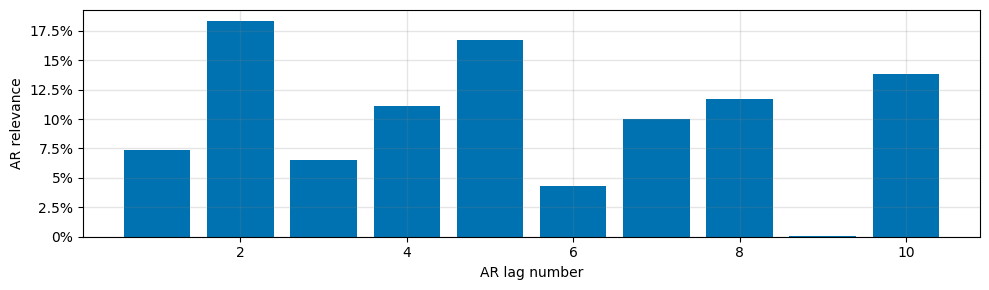

In [113]:
m.plot_parameters(components=["autoregression"])

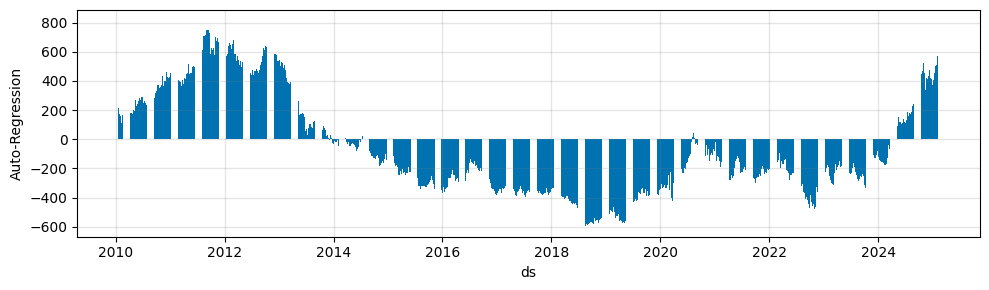

In [48]:
m.plot_components(forecast, components=["autoregression"])

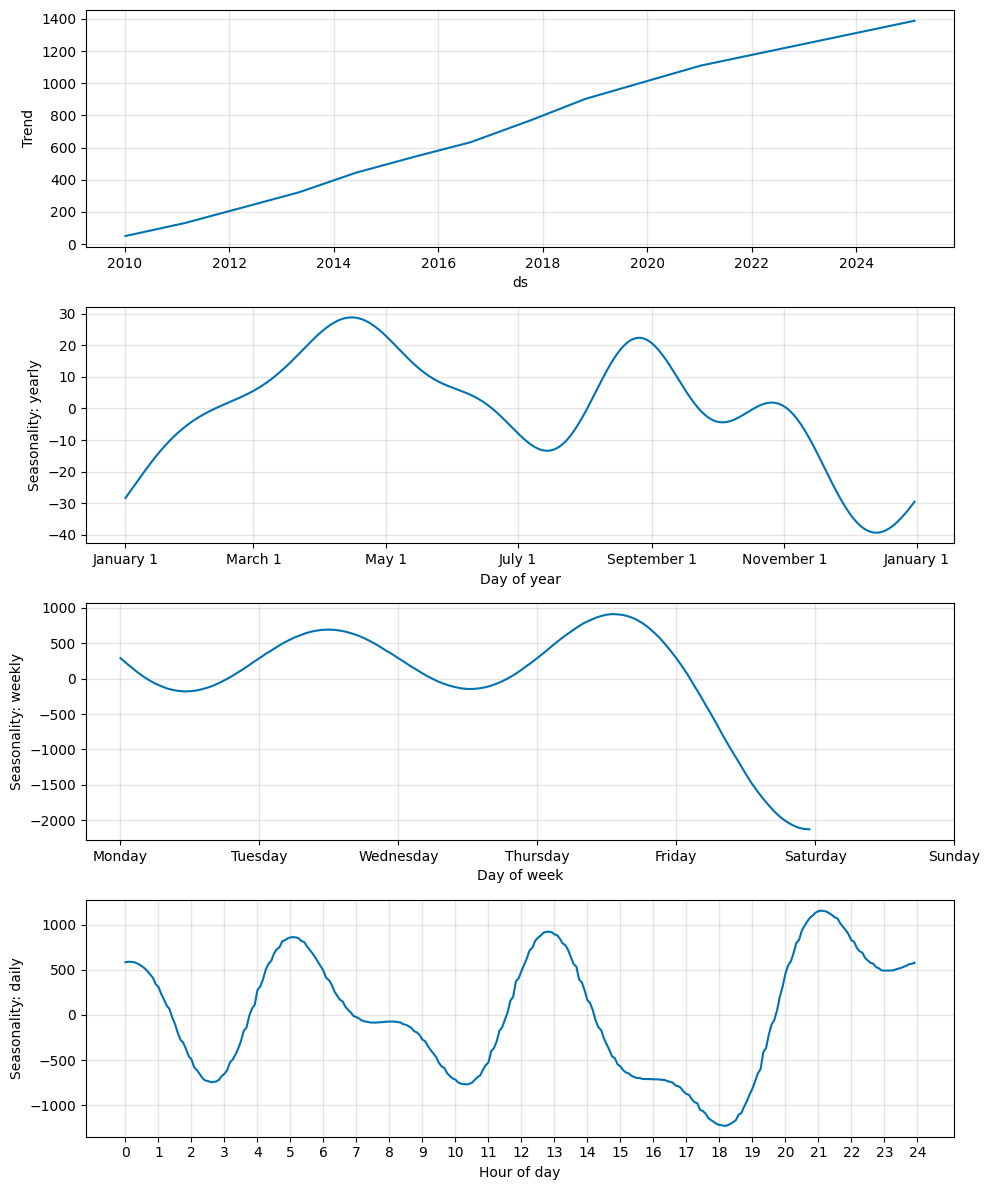

In [49]:
m.plot_parameters(components=["trend", "seasonality"])

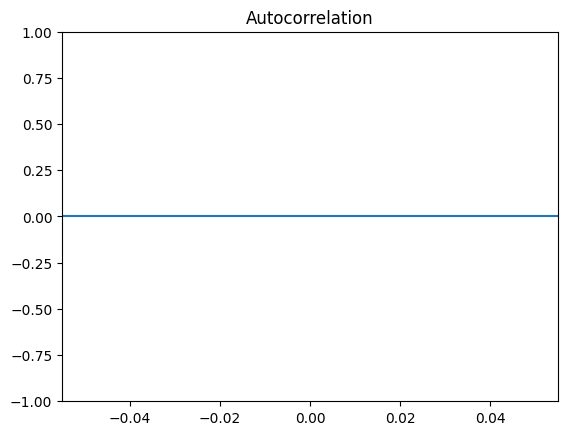

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

In [51]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [55]:
# evaluate uncertainy on calibration set

m = NeuralProphet(
    quantiles=quantiles
)
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 239/239 [00:04<00:00, 57.12it/s]


Training: |          | 0/? [01:16<?, ?it/s, v_num=16, train_loss=0.0167, reg_loss=0.000, MAE=87.90, RMSE=121.0, Loss=0.0166, RegLoss=0.000]  
Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 54.05it/s]

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [56]:

train_df, cal_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 64.52it/s]

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [65]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 3800
Train dataset size: 3156
Validation dataset size: 796


In [66]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr: 100%|██████████| 237/237 [00:07<00:00, 30.47it/s]


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,2400.566406,2752.237061,2.873211,0.0,0,2.758704,0.0,3030.888428,3445.276367,2.736472,0.0
1,1206.841553,1380.725098,1.372307,0.0,1,1.271770,0.0,1467.139893,1701.211304,1.262817,0.0
2,655.061768,770.829224,0.683286,0.0,2,0.654683,0.0,816.787720,972.167786,0.656419,0.0
3,356.495911,438.933014,0.318555,0.0,3,0.331345,0.0,458.149658,574.785217,0.330120,0.0
4,184.606598,232.477814,0.121632,0.0,4,0.151707,0.0,253.543640,324.596313,0.150430,0.0
...,...,...,...,...,...,...,...,...,...,...,...
75,21.376392,27.880053,0.002051,0.0,75,0.000912,0.0,15.541677,21.435251,0.000916,0.0
76,21.419470,27.925207,0.002058,0.0,76,0.000910,0.0,15.380477,21.259260,0.000903,0.0
77,21.432693,27.960073,0.002063,0.0,77,0.000911,0.0,15.546018,21.413807,0.000915,0.0
78,21.403307,27.924423,0.002058,0.0,78,0.000910,0.0,15.497107,21.353920,0.000906,0.0
